# 1. (a) Download the banknote authentication Data Set

In [19]:
import sys
import warnings
from sklearn.model_selection import train_test_split
import random
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.metrics import hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl
from scipy.spatial.distance import cdist
if not sys.warnoptions:
    warnings.simplefilter("ignore")

(a) Download the banknote authentication Data Set from: https://archive.ics.
uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly
as the test set. This is a binary classification problem.

In [7]:

df = pd.read_csv('C:/Users/Krishna/Desktop/usc/ML INF/ass4/data_banknote_authentication.txt', header=None)
#df.columns=['variance','skewness','curtosis','entropy','class']
df.columns = ['c1', 'c2','c3', 'c4','c5']
print(df)

#np.random.shuffle(df)
df_shuffled=df.sample(frac=1).reset_index(drop=True)
test_data=df_shuffled[0:472]
train_data = df_shuffled[472:]


#print(train_data.iloc[1])

            c1        c2         c3        c4  c5
0     3.621600   8.66610  -2.807300 -0.446990   0
1     4.545900   8.16740  -2.458600 -1.462100   0
2     3.866000  -2.63830   1.924200  0.106450   0
3     3.456600   9.52280  -4.011200 -3.594400   0
4     0.329240  -4.45520   4.571800 -0.988800   0
5     4.368400   9.67180  -3.960600 -3.162500   0
6     3.591200   3.01290   0.728880  0.564210   0
7     2.092200  -6.81000   8.463600 -0.602160   0
8     3.203200   5.75880  -0.753450 -0.612510   0
9     1.535600   9.17720  -2.271800 -0.735350   0
10    1.224700   8.77790  -2.213500 -0.806470   0
11    3.989900  -2.70660   2.394600  0.862910   0
12    1.899300   7.66250   0.153940 -3.110800   0
13   -1.576800  10.84300   2.546200 -2.936200   0
14    3.404000   8.72610  -2.991500 -0.572420   0
15    4.676500  -3.38950   3.489600  1.477100   0
16    2.671900   3.06460   0.371580  0.586190   0
17    0.803550   2.84730   4.343900  0.601700   0
18    1.447900  -4.87940   8.342800 -2.108600   0


#### (b). i. Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure. i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.1 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [17]:

y=pd.DataFrame()
X=pd.DataFrame()
test_err_passive=[]
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
kf=KFold(10)
for i in range(1,50,1): 
    testerr_p=[]
    train_datas=train_data
    
    for j in range(10, 910, 10 ):
                #print(train_datas.shape)
                X_temp=train_datas.sample(n=10, replace=False )
                train_datas= train_datas.drop(X_temp.index)
                
                
                y= pd.concat([y, X_temp[['c5']]],axis=0, sort= False)
                
                X=pd.concat([X, X_temp.iloc[:,0:4]],axis=0, sort= False)
                
                #clf = SVC(kernel='linear', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
                #svc= LinearSVC(penalty='l1',dual=False)
                lsm=GridSearchCV(SVC(kernel='linear'), param_grid=param_grid, cv=kf)
                lsm.fit(X,y,)
                y_pred= lsm.predict(test_data.iloc[:,0:4])
                acc= 1-mean_squared_error(test_data['c5'] ,y_pred)
                #acc= 1- lsm.score(test_data.iloc[:,0:4], y_pred)
                if(acc>.7):
                    #print("The best parameters are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))
                    testerr_p.append(mean_squared_error(test_data['c5'] ,y_pred))
                    #print(testerr)
    #print(testerr)
    #print(np.average(testerr))
    test_err_passive.append(np.average(testerr))
    #print(test_err_passive)

In [88]:
print("Passive error values")
print(test_err_passive)

Passive error values
[0.023418203244121027, 0.01877958174574485, 0.026947440923912387, 0.026483277131836805, 0.02914697703170291, 0.01698156850256851, 0.021929242419584175, 0.023392192854666333, 0.020623434595730725, 0.027197524457235167, 0.018695118802383733, 0.017737721210186925, 0.019289244678558786, 0.027560786397423383, 0.01879646056195104, 0.018845844124615332, 0.018884627199092417, 0.018627395142488446, 0.01963817810833752, 0.022529339636272648, 0.012986125213604172, 0.017601913186710165, 0.02965910770318006, 0.011377775903575651, 0.014943177983231602, 0.021024905140786802, 0.019814059459689316, 0.010326496619045672, 0.02290632007735809, 0.025850912101156927, 0.01243843255025007, 0.014024904601710141, 0.010923855546651968, 0.025742036142760744, 0.029210747947263478, 0.022595884201671437, 0.013088884838623844, 0.022596367011333184, 0.027901360191077952, 0.019835863199821654, 0.02619524802413207, 0.021447669862348376, 0.024225223232891446, 0.02659444129978053, 0.024812575590634288

#### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM2 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool.Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.


In [10]:
train_datas=train_data
y=pd.DataFrame()
X=pd.DataFrame()
test_err_active=[]
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
kf=KFold(10)

X_temp=train_datas.sample(n=10, replace=False )
train_datas.drop(X_temp.index)



y= pd.concat([y, X_temp[['c5']]],axis=0, sort= False)

X=pd.concat([X, X_temp.iloc[:,0:4]],axis=0, sort= False)



#clf = SVC(kernel='linear', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
#svc= LinearSVC(penalty='l1',dual=False)
s=SVC(kernel='linear')
s.fit(X, y)
lsm=GridSearchCV(s, param_grid=param_grid, cv=kf)
lsm.fit(X,y,)
y_pred= lsm.predict(test_data.iloc[:,0:4])
acc= 1-mean_squared_error(test_data['c5'] ,y_pred)
if(acc>.7):
    #print("The best parameters are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))
    testerr.append(mean_squared_error(test_data['c5'] ,y_pred))
                
test_err_active.append(np.average(testerr)) 


for i in range(1,50,1): 
    testerr_a=[]
    
    for j in range(20, 910, 10):
                 
                dec = s.decision_function(train_datas.iloc[:,0:4])
                w_norm = np.linalg.norm(s.coef_)
                dist = dec / w_norm   ## distance form dec boundary
                selectd=np.absolute(dist).argsort()[:10]
                
                y= pd.concat([y, train_datas.iloc[selectd.tolist(),[4]]],axis=0, sort= False)
                    

                
                
                X=pd.concat([X, train_datas.iloc[selectd.tolist(),[0,1,2,3]]],axis=0, sort= False)
                #train_datas.drop(selectd.tolist())
                train_datas=train_datas.drop(train_datas.index[selectd])
                
                
                #clf = SVC(kernel='linear', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
                #svc= LinearSVC(penalty='l1',dual=False)
                s=SVC(kernel='linear')
                s.fit(X, y)
                lsm=GridSearchCV(s, param_grid=param_grid, cv=kf)
                lsm.fit(X,y,)
                y_pred= lsm.predict(test_data.iloc[:,0:4])
                #acc= 1-mean_squared_error(test_data['c5'] ,y_pred)
                acc= lsm.score(test_data.iloc[:,0:4], y_pred)
                if(acc>.7):
                    #print("The best parameters are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))
                    testerr_a.append(mean_squared_error(test_data['c5'] ,y_pred))
    #print(np.average(testerr))           
    test_err_active.append(np.average(testerr))       
#print(test_err_active)

In [80]:
print("Active error values")
print(test_err_active)


Active error values
[0.012897911980072393, 0.011951937561318111, 0.01715556105643836, 0.01723832107143101, 0.0174158883833477, 0.014495109342733481, 0.01327428798669786, 0.015966689335454164, 0.012428214556317398, 0.017448228971338266, 0.01876401720359909, 0.013593526943787607, 0.016854361654823187, 0.014934876975208707, 0.016116758726593648, 0.015162841213303892, 0.014483046225659338, 0.01685061844157966, 0.01843406291990315, 0.017122167060285826, 0.01691321833277262, 0.014090421595265152, 0.019269508307367726, 0.016317342010961966, 0.018700255754137564, 0.01496275618703965, 0.015770000321783148, 0.012130932383489801, 0.015535158573126095, 0.01814012283701826, 0.01674848030842273, 0.013452877949197833, 0.01674143722792913, 0.015893155005803086, 0.01606744114996756, 0.013270987545973358, 0.019015814621486334, 0.017495013469498576, 0.014825817351029412, 0.01812633666424009, 0.015508429168415477, 0.019302014148950806, 0.018395652927604624, 0.014260458100367971, 0.018053108170161737, 0.01

#### c. Average the test errors for the incrementally trained 90 SVMs in 1(b)i and1(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions.

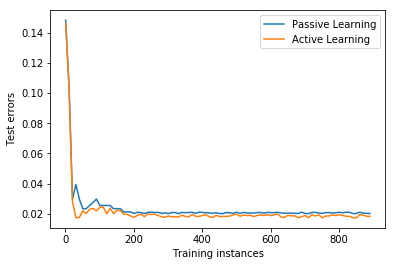

In [153]:
x_ax=np.arange(1,900, 10)
fig = plt.figure()
ax = plt.axes()
ax.plot(x_ax, testerr_p,label='Passive Learning')
ax.plot(x_ax, testerr_a,label='Active Learning')
plt.xlabel('Training instances')
plt.ylabel('Test errors')
plt.legend()
plt.show()

Conclusions: From the graph, we can see that the active learning gives lower errors compared to passive learning on same number of training instances. Hence we can say that active learning is slightly better than passive learning. 

## 2. Multi-class and Multi-Label Classification Using Support Vector Machines

#### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29#. Choose 70% of the datarandomly as the training set.

In [72]:

df_ = pd.read_csv('C:/Users/Krishna/Desktop/usc/ML INF/ass4/Frogs_MFCCs.csv')
#print(np.unique(df_['Family']))
#df_= df_.drop(['RecordID'], axis=1)

#OHE
df_ohe= pd.DataFrame()
for column in df_:
    
    if type(df_[column][0]) == str:
        values= np.array(df_[column])
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(values)
        df_ohe_temp=pd.DataFrame(integer_encoded)
        df_ohe_temp.columns= [column]
        df_ohe=pd.concat([df_ohe, df_ohe_temp],axis=1, sort= False)

df_cl= pd.concat([df_.iloc[:,0:22], df_ohe], axis=1, sort=False)
df_cl= pd.concat([df_cl, df_['RecordID']], axis=1, sort=False)

#print(df_cl.shape)





X_train, X_test = train_test_split(df_cl, test_size=0.3, random_state=42)
X_tr= pd.DataFrame()
X_te= pd.DataFrame()
X_tr= X_train.iloc[:, 0:22]
X_tr= pd.concat([X_tr,X_train['RecordID']], axis=1, sort=False)


X_te= X_test.iloc[:, 0:22]
X_te= pd.concat([X_te,X_test['RecordID']], axis=1, sort=False)


# B. ii.

In [283]:
from sklearn.metrics import hamming_loss
C_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 0.01,0.1, 0.2,0.5]
param_grid = dict(gamma=gamma_range, C=C_range)
kf=KFold(10)

lsm=GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid=param_grid, cv=kf)

lsm.fit(X_tr, X_train['Family'],)

print("The best parameters for predicting Family are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))

lsm.fit(X_tr, X_train['Genus'],)

print("The best parameters for predicting Genus are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))

lsm.fit(X_tr, X_train['Species'],)

print("The best parameters for predicting Species are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))


The best parameters for predicting Family are {'C': 1, 'gamma': 0.1} with a score of 1.00
The best parameters for predicting Genus are {'C': 1, 'gamma': 0.1} with a score of 1.00
The best parameters for predicting Species are {'C': 1, 'gamma': 0.1} with a score of 1.00


In [73]:



clf = SVC(kernel='rbf', decision_function_shape='ovr', C=1, gamma= .1)
clf.fit(X_tr, X_train['Family']) 
y_pred=clf.predict(X_te)
print("Hamming loss for family: ", hamming_loss(X_test['Family'], y_pred))


clf.fit(X_tr, X_train['Genus']) 
y_pred=clf.predict(X_te)
print("Hamming loss for genus: ",hamming_loss(X_test['Genus'], y_pred))


clf.fit(X_tr, X_train['Species']) 
y_pred=clf.predict(X_te)
print("Hamming loss for Species: ", hamming_loss(X_test['Species'], y_pred))





Hamming loss for family:  0.000463177396943
Hamming loss for genus:  0.000463177396943
Hamming loss for Species:  0.000463177396943


# b. iii.

In [284]:
from sklearn import preprocessing
from sklearn.svm import LinearSVC
#normmalize

normalized_X = preprocessing.normalize(X_tr)
normalized_train= pd.DataFrame(normalized_X)

normalized_X = preprocessing.normalize(X_te)
normalized_test= pd.DataFrame(normalized_X)
print(normalized_train.shape)
print(normalized_test.shape)





C_range = [1, 10, 100, 1000]

param_grid = dict( C=C_range)
kf=KFold(10)

lsm=GridSearchCV(LinearSVC(penalty='l1', multi_class='ovr',  dual= False), param_grid=param_grid, cv=kf)

lsm.fit(normalized_train, X_train['Family'],)

print("The best parameters for Family are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))


lsm.fit(normalized_train, X_train['Genus'],)

print("The best parameters for Genus are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))

lsm.fit(normalized_train, X_train['Species'],)

print("The best parameters for Species are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))







(5036, 23)
(2159, 23)
The best parameters for Family are {'C': 1000} with a score of 0.97
The best parameters for Genus are {'C': 1000} with a score of 0.97
The best parameters for Species are {'C': 1000} with a score of 0.98


In [76]:

clf = LinearSVC(penalty='l1', multi_class='ovr', C=1000, dual= False)
clf.fit(normalized_train, X_train['Family']) 
y_pred=clf.predict(normalized_test)
print("Hamming loss for family: ", hamming_loss(X_test['Family'], y_pred))


clf.fit(normalized_train, X_train['Genus']) 
y_pred=clf.predict(normalized_test)
print("Hamming loss for genus : ", hamming_loss(X_test['Genus'], y_pred))


clf.fit(normalized_train, X_train['Species']) 
y_pred=clf.predict(normalized_test)
print("Hamming loss for species: ", hamming_loss(X_test['Species'], y_pred))



Hamming loss for family:  0.0421491431218
Hamming loss for genus :  0.024085224641
Hamming loss for species:  0.0180639184808


# b. iv. 

In [160]:
from imblearn.over_sampling import SMOTE
#smote
sm = SMOTE(random_state=42)
X_smote_f, y_smote_f = sm.fit_sample(normalized_train.values, X_train['Family'].values)
X_smote_g, y_smote_g = sm.fit_sample(normalized_train.values, X_train['Genus'].values)
X_smote_s, y_smote_s = sm.fit_sample(normalized_train.values, X_train['Species'].values)

C_range = [1, 10, 100, 1000]

param_grid = dict( C=C_range)
kf=KFold(10)

lsm=GridSearchCV(LinearSVC(penalty='l1', multi_class='ovr',  dual= False), param_grid=param_grid, cv=kf)

lsm.fit(X_smote_f, y_smote_f,)

print("The best parameters for Family are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))

lsm.fit(X_smote_g, y_smote_g,)

print("The best parameters for Genus are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))

lsm.fit(X_smote_s, y_smote_s,)

print("The best parameters for Species are %s with a score of %0.2f" % (lsm.best_params_, lsm.best_score_))



The best parameters for Family are {'C': 1000} with a score of 0.96
The best parameters for Genus are {'C': 1000} with a score of 0.96
The best parameters for Species are {'C': 1000} with a score of 0.92


In [79]:
clf = LinearSVC(penalty='l1', multi_class='ovr', C=1000, dual= False)
clf.fit(X_smote_f, y_smote_f) 
y_pred=clf.predict(normalized_test)
print("Hamming loss for family: ",hamming_loss(X_test['Family'], y_pred))


clf.fit(X_smote_g, y_smote_g) 
y_pred=clf.predict(normalized_test)
print("Hamming loss for genus: ", hamming_loss(X_test['Genus'], y_pred))


clf.fit(X_smote_s, y_smote_s) 
y_pred=clf.predict(normalized_test)
print("Hamming loss for species: ",hamming_loss(X_test['Species'], y_pred))



Hamming loss for family:  0.0671607225567
Hamming loss for genus:  0.0264011116258
Hamming loss for species:  0.0203798054655


Conclusions: We can see that the values of hamming loss has slightly increased after performing smote. So we can conclude that performing smote in this case does not help in improving accuracy of SVC.

# 3. a.

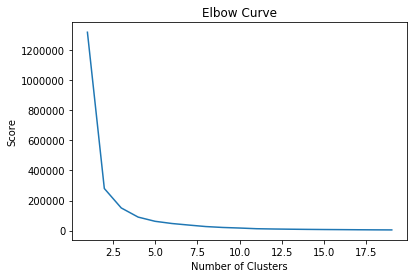

In [146]:
score=[]
#Nc = range(1, 20)
for i in range(1, 20): 
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_cl)
    #kmeans = KMeans(n_clusters=2, random_state=0).fit(df_cl)
    #kmeans

#score = [kmeans[i].fit(df_cl).score(df_cl) for i in range(len(kmeans))]
    score.append(kmeans.inertia_)
#score= np.flip(score, axis=0)

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()






By using the elbow method, it can be inferred that  the best value of K is around 3. 

# 3. b.

In [43]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_cl)
op= kmeans.labels_

indices_0= np.where(op == 0)[0]
indices_1= np.where(op == 1)[0]
indices_2= np.where(op == 2)[0]

#print(len(indices_0))
#print(len(indices_1))
#print(len(indices_2))
#print(df_.loc[indices_0])
#print("Number of each subgroups in Family for Cluster-1")
#print(df_.loc[indices_0]['Family'].value_counts())
d=df_.loc[indices_0]['Family'].value_counts().to_dict()
print("Majority family in Cluster 1")
print(max(d, key=d.get))

#print("Number of each subgroups in Family for Cluster-2")
#print(df_.loc[indices_1]['Family'].value_counts())
d=df_.loc[indices_1]['Family'].value_counts().to_dict()
print("Majority family in Cluster 2")
print(max(d, key=d.get))

#print("Number of each subgroups in Family for Cluster-3")
#print(df_.loc[indices_2]['Family'].value_counts())
d=df_.loc[indices_2]['Family'].value_counts().to_dict()
print("Majority family in Cluster 3")
print(max(d, key=d.get))

#print("Number of each subgroups in Genus for Cluster-1")
#print(df_.loc[indices_0]['Genus'].value_counts())
d=df_.loc[indices_0]['Genus'].value_counts().to_dict()
print("Majority Genus in Cluster 1")
print(max(d, key=d.get))



#print("Number of each subgroups in Genus for Cluster-2")
#print(df_.loc[indices_1]['Genus'].value_counts())
d=df_.loc[indices_1]['Genus'].value_counts().to_dict()
print("Majority Genus in Cluster 2")
print(max(d, key=d.get))


#print("Number of each subgroups in Genus for Cluster-3")
#print(df_.loc[indices_2]['Genus'].value_counts())
d=df_.loc[indices_2]['Genus'].value_counts().to_dict()
print("Majority Genus in Cluster 3")
print(max(d, key=d.get))


#print("Number of each subgroups in Species for Cluster-1")
#print(df_.loc[indices_0]['Species'].value_counts())
d=df_.loc[indices_0]['Species'].value_counts().to_dict()
print("Majority Species in Cluster 1")
print(max(d, key=d.get))


#print("Number of each subgroups in Species for Cluster-2")
#print(df_.loc[indices_1]['Species'].value_counts())
d=df_.loc[indices_1]['Species'].value_counts().to_dict()
print("Majority Species in Cluster 2")
print(max(d, key=d.get))

#print("Number of each subgroups in Species for Cluster-3")
#print(df_.loc[indices_2]['Species'].value_counts())
d=df_.loc[indices_2]['Species'].value_counts().to_dict()
print("Majority Species in Cluster 3")
print(max(d, key=d.get))


Majority family in Cluster 1
Leptodactylidae
Majority family in Cluster 2
Hylidae
Majority family in Cluster 3
Leptodactylidae
Majority Genus in Cluster 1
Adenomera
Majority Genus in Cluster 2
Hypsiboas
Majority Genus in Cluster 3
Adenomera
Majority Species in Cluster 1
AdenomeraHylaedactylus
Majority Species in Cluster 2
HypsiboasCordobae
Majority Species in Cluster 3
AdenomeraAndre


# 3. c.

In [147]:
from sklearn.metrics import hamming_loss
from scipy.spatial import distance



df_['Col_fam'] = ""
df_['Col_gen']=""
df_['Col_sp']= ""
#print(df_)

for i in indices_0:
    df_.at[i, 'Col_fam'] = 'Leptodactylidae'
    df_.at[i, 'Col_gen'] = 'Adenomera'
    df_.at[i, 'Col_sp'] = 'AdenomeraHylaedactylus'

    
for i in indices_1:
    df_.at[i, 'Col_fam'] = 'Hylidae'
    df_.at[i, 'Col_gen'] = 'Hypsiboas'
    df_.at[i, 'Col_sp'] = 'HypsiboasCordobae'

for i in indices_2:
    df_.at[i, 'Col_fam'] = 'Leptodactylidae'
    df_.at[i, 'Col_gen'] = 'Adenomera'
    df_.at[i, 'Col_sp'] = 'AdenomeraAndre'

#print(df_.shape)
for i in range(0,50,1):
    dist=1
    for r in indices_0:
        true= np.array(df_[['Family','Genus','Species']].ix[r])
        pred=np.array(df_[['Col_fam','Col_gen','Col_sp']].ix[r])
        dist1+=distance.hamming(true, pred) 
    


    dist=2
    for r in indices_1:
        true= np.array(df_[['Family','Genus','Species']].ix[r])
        pred=np.array(df_[['Col_fam','Col_gen','Col_sp']].ix[r])
        dist2+=distance.hamming(true, pred) 
    

    dist=3
    for r in indices_2:
        true= np.array(df_[['Family','Genus','Species']].ix[r])
        pred=np.array(df_[['Col_fam','Col_gen','Col_sp']].ix[r])
        dist3+=distance.hamming(true, pred) 
    
print("Average hamming distance for cluster 1")
print(dist1/len(indices_0))
print("Average hamming distance for cluster 2")
print(dist2/len(indices_1))
print("Average hamming distance for cluster 3")
print(dist3/len(indices_2))

Average hamming distance for cluster 1
0.0641534391534
Average hamming distance for cluster 2
0.323661036524
Average hamming distance for cluster 3
0.40708915145


# ISLR 10.7.2

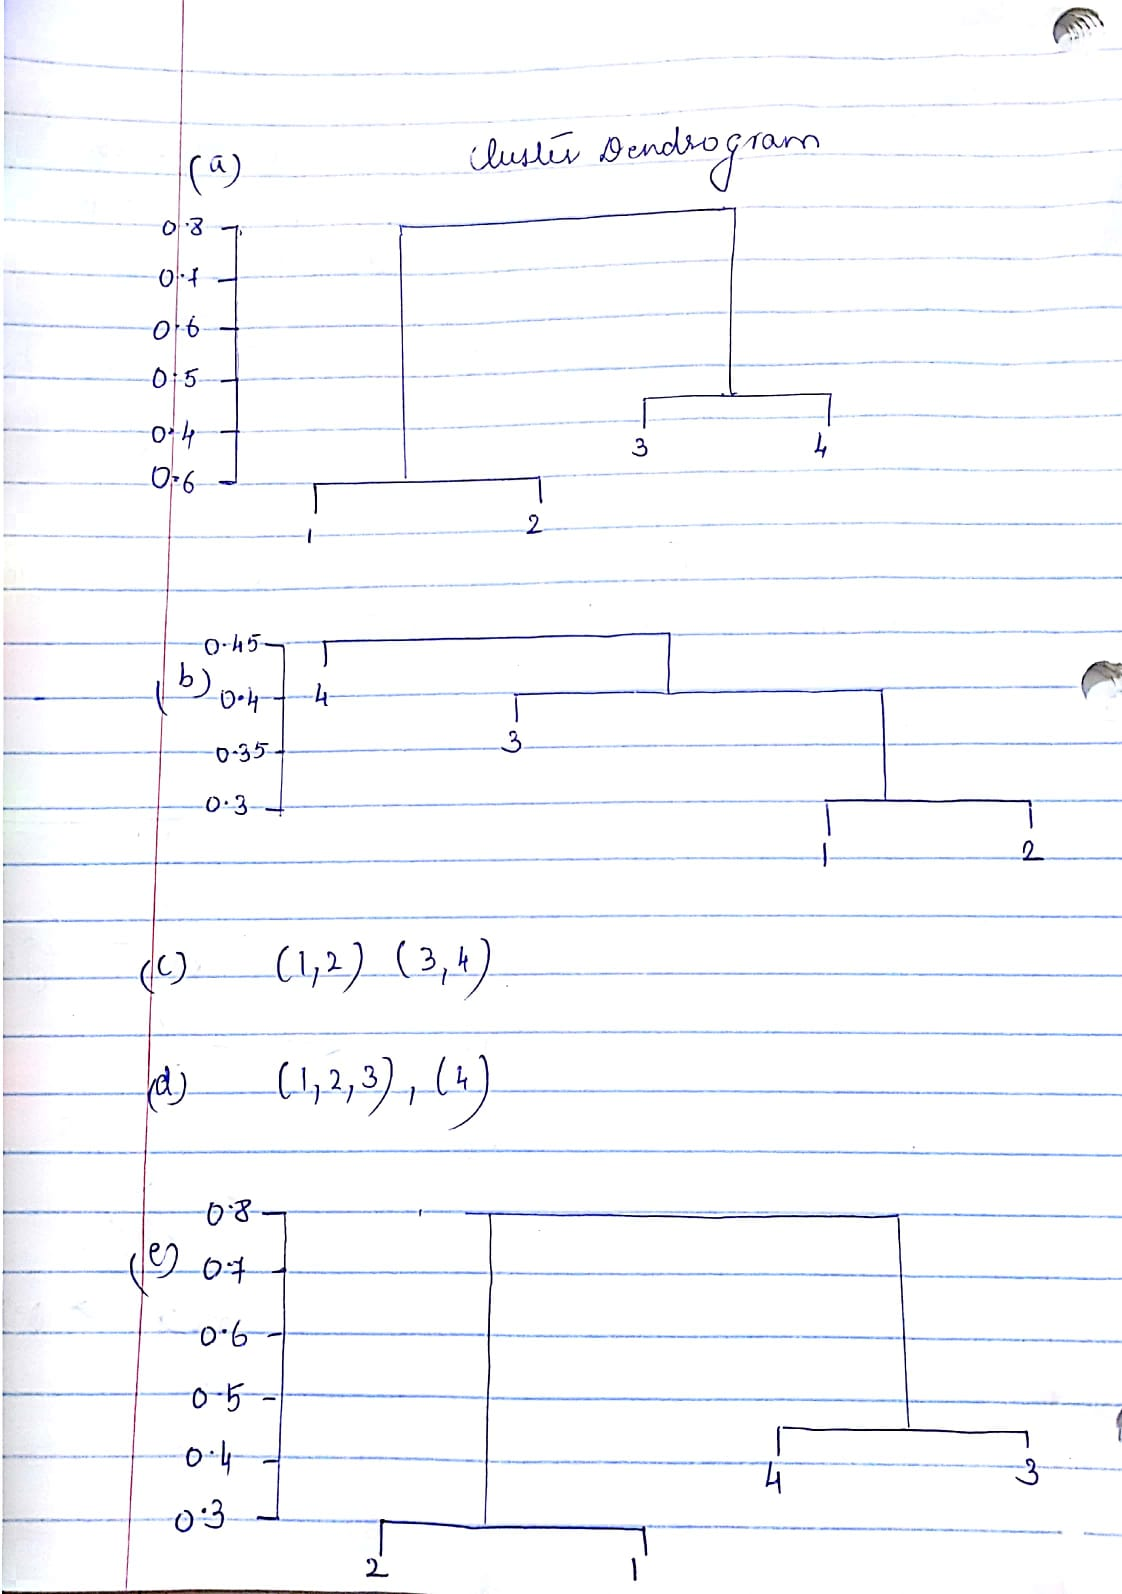

In [70]:
from IPython.display import Image
PATH = "./"
Image(filename = PATH +"ISLR 10.7.2.jpeg", width=500, height=500)
